In [1]:
import numpy as np
import pandas as pd 
import skimage, os
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

In [3]:
img_path = "images//"
print(os.listdir(img_path))

['sample_image.nii.gz']


In [4]:
#FOR DEMO ONLY, QUICKLY CROP UNWANTED VOLUMES AND COMPRESS IMAGE TO REDUCE FILE SIZE
# test_img = os.listdir(img_path)[0]
# test_img = nib.load(img_path+test_img)
# arr_img = test_img.get_fdata()
# arr_img = arr_img[:,:,:,0:30]
# arr_img = nib.Nifti1Image (arr_img, test_img.affine)
# arr_img.to_filename ("sample_image.nii.gz")
# print(arr_img.shape)

In [5]:
test_img = os.listdir(img_path)[0] #change index if you want to use a test image besides the first
time = 0 #adjust as needed, espeially if there are different modalities or treatments in scan

#the following settings should apply to our PV6 reconstruction, but can be adjusted to fit other orientations
test_img = nib.load(img_path + test_img).get_fdata()
test_img = np.rot90(test_img[:,:,:,time],3)
test_img = np.moveaxis(test_img, -1, 0)
print(test_img.shape)


(12, 80, 80)


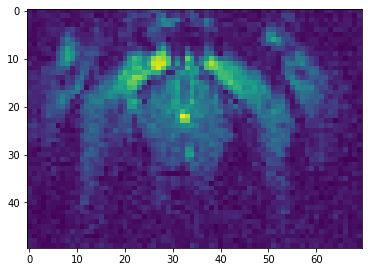

In [6]:
#Check a single image and play with cropping if desired (last 2 dims of img)
fig,ax1 = plt.subplots(figsize = (6,6))
ax1.imshow(test_img[0,15:-15,5:-5])

In [7]:
from skimage.util import montage
import matplotlib.colors as colors

sample_image.nii.gz


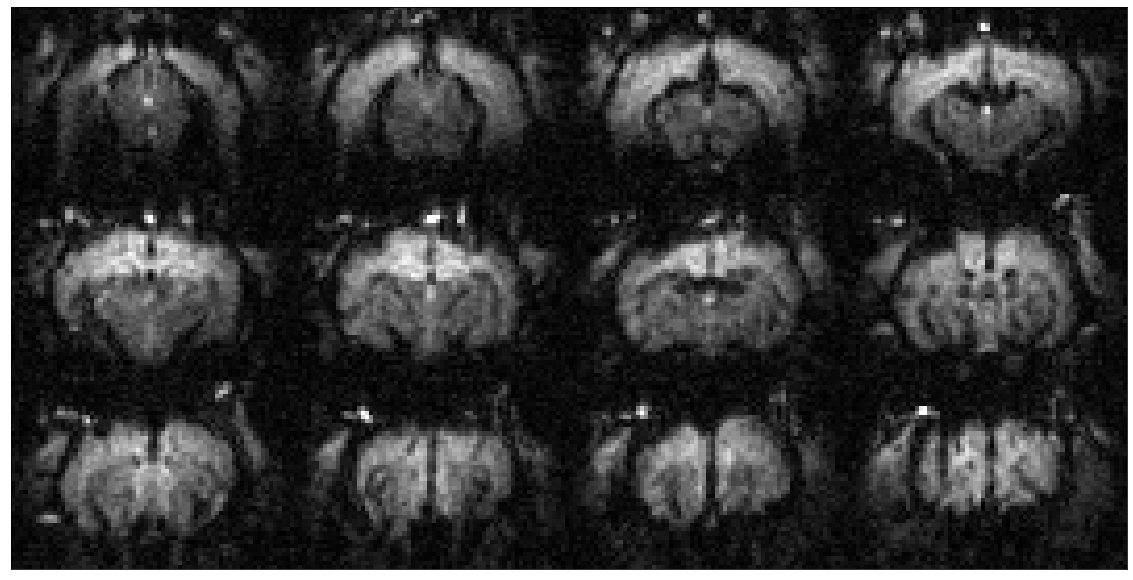

In [8]:
#print and volumes for every image in folder - edit cropping if desired (last 2 dims of img), grid_shape, intensity scaling (individually or global with v), and cmap if needed.

time = 0

for img in os.listdir(img_path):
    test_img = nib.load(img_path + img).get_fdata()
    test_img = np.rot90(test_img[:,:,:,time],3)
    test_img = np.moveaxis(test_img, -1, 0)
    
    print(img)
    fig,ax1 = plt.subplots(figsize = (20,20))
    ax1.axes.xaxis.set_visible(False)
    ax1.axes.yaxis.set_visible(False)
    ax1.imshow(montage(test_img[:,15:-20,5:-8], grid_shape = (3,4), rescale_intensity = False), vmin = 0, vmax = 800, cmap = 'gray')
    plt.show()

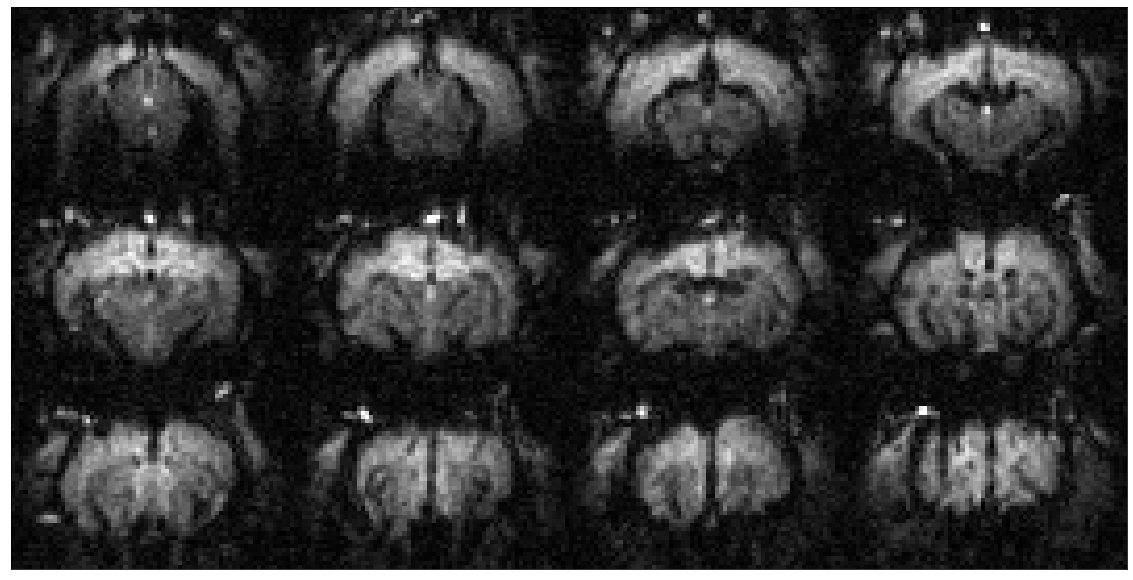

In [10]:
#Select image to save full volume. Play with cropping if desired (last 2 dims of img), grid_shape, intensity scaling (individually or global with v), and cmap if needed.

img = "sample_image.nii.gz"

test_img = nib.load(img_path + img).get_fdata()
test_img = np.rot90(test_img[:,:,:,time],3)
test_img = np.moveaxis(test_img, -1, 0)

fig,ax1 = plt.subplots(figsize = (20,20))
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax1.imshow(montage(test_img[:,15:-20,5:-8], grid_shape = (3,4), rescale_intensity = False), vmin = 0, vmax = 800, cmap = 'gray')
plt.savefig(img + ".png", bbox_inches = 'tight')
plt.show()